In [2]:
import enzymeML_builder.EnzymeML_builder as EnzymeMLBuilder

#columns = ["Column2", "Column3","Column4","Column5", "Column7", "Column8","Column9", "Column10" ]
#concentrations = [0, 1,2,3]
#columns = ["Column2", "Column3","Column4","Column5" ]

#for i, j in zip(columns, concentrations):

#    data = EnzymeMLBuilder.EnzymeMLBuilder("j", i, j).build_measurements_list()

TypeError: expected string or bytes-like object

In [53]:
import pandas as pd

from submodule_copy import importer


df1 = None
df2 = None
df3 = None
df4 = None
df5 = None
df6 = None

dfs = [df1, df2, df3, df4, df5]

vars = locals()

vars["df11"] = "Hallo!!"


#document1 = importer('A540nm/AlaricnoEnzml1mmolL.omex').build_data_frame()
#print("document1", document1)


for i in concentrations:
  print("Loop at position",i)
  #path = 'A540nm/AlaricnoEnzml1mmolL.omex'
  path = 'A540nm/AlaricnoEnzml'+str(i)+'mmolL.omex'
  document = importer(path).build_data_frame()
  vars["df"+str(i)] = importer(path).build_data_frame()


Loop at position 0
Loop at position 1
Loop at position 2
Loop at position 3


'\nax.plot(document["x_values"],document["reference_0"], color="black")\nax.plot(document["x_values"],document["reference_2"], color="black")\nax.plot(document["x_values"],document["reference_1"], color="black")\nax.plot(document["x_values"],document["sample_0"], color="black", marker="d")\nax.plot(document["x_values"],document["sample_1"], color="black", marker="d")\nax.plot(document["x_values"],document["sample_2"], color="black", marker="d")\n\n'

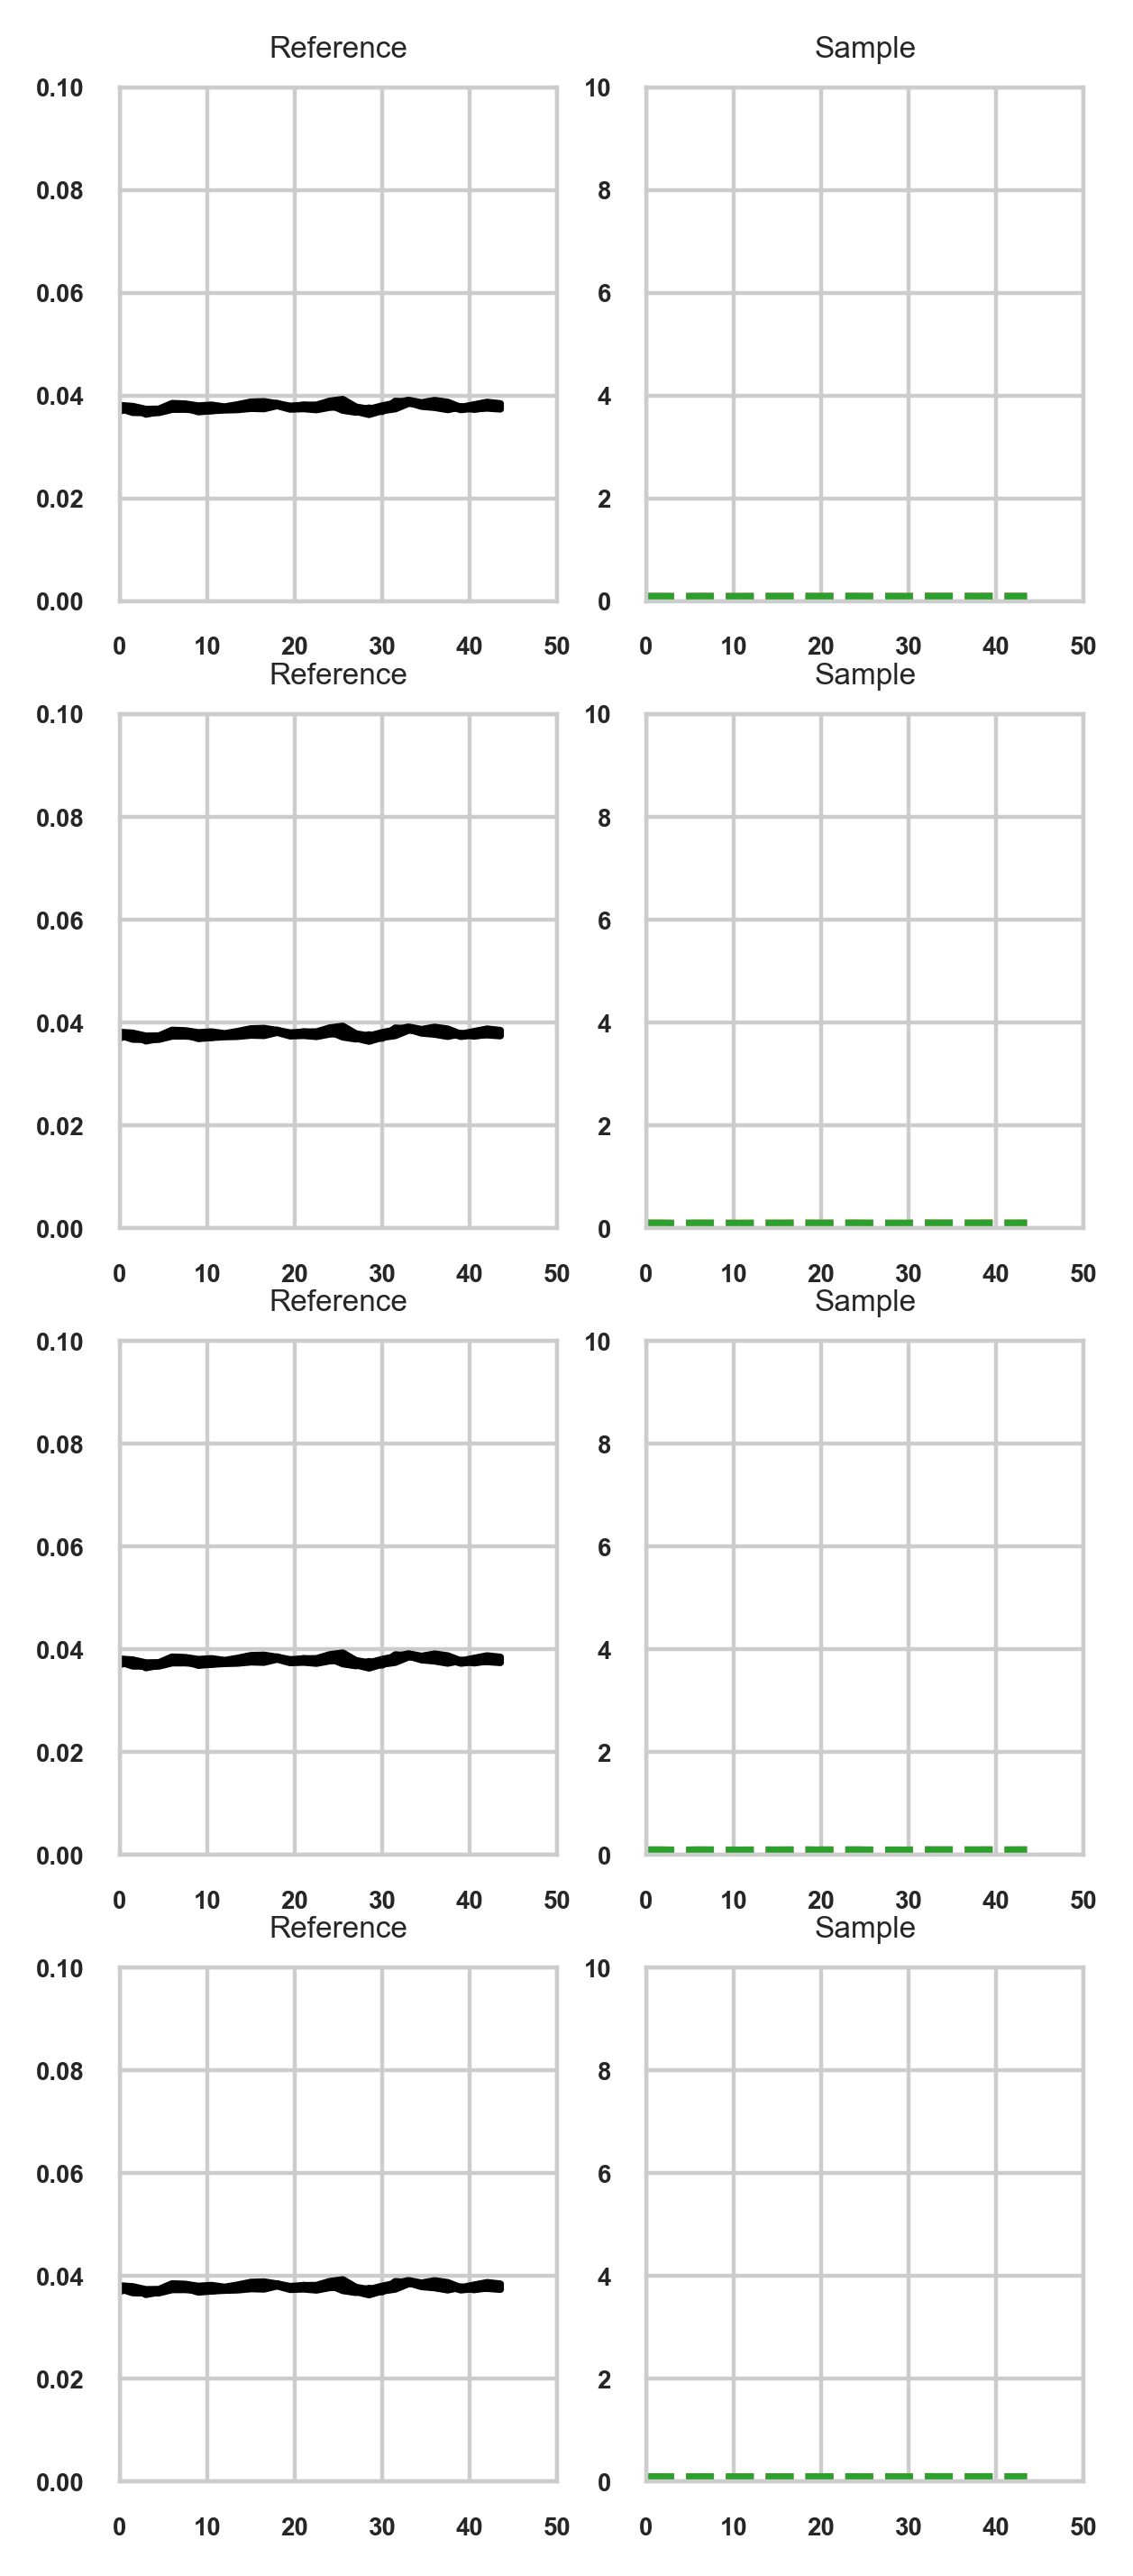

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}

plt.rc('font', **font)

plt.rcParams['figure.dpi'] =400 
sns.set_style("whitegrid")
fig, ax = plt.subplots(4, 2, figsize=(3,7))
for i in concentrations:

    #fig,ax=plt.subplots()

    conc = locals()["df"+str(concentrations.index(i))]
    index = concentrations.index(i)
    for j in range(3):
        x_values = pd.to_numeric(conc["x_values"])
        y_values = pd.to_numeric(conc["reference_"+str(j)])
        ax[index, 0].plot(x_values, y_values, color="black")
        
    
    for k in range(3):        
        x_values = pd.to_numeric(conc["x_values"])
        y_values = pd.to_numeric(conc["sample_"+str(j)])
        ax[index, 1].plot(x_values, y_values, linestyle="--")

    ax[index, 0].set_ylim(0,0.1)
    ax[index, 0].set_title("Reference")
    ax[index, 0].set_xlim(0,50)
    ax[index, 1].set_title("Sample")
    ax[index, 1].set_ylim([0,10])
    ax[index, 1].set_xlim(0,50)


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.1)


None
1
2


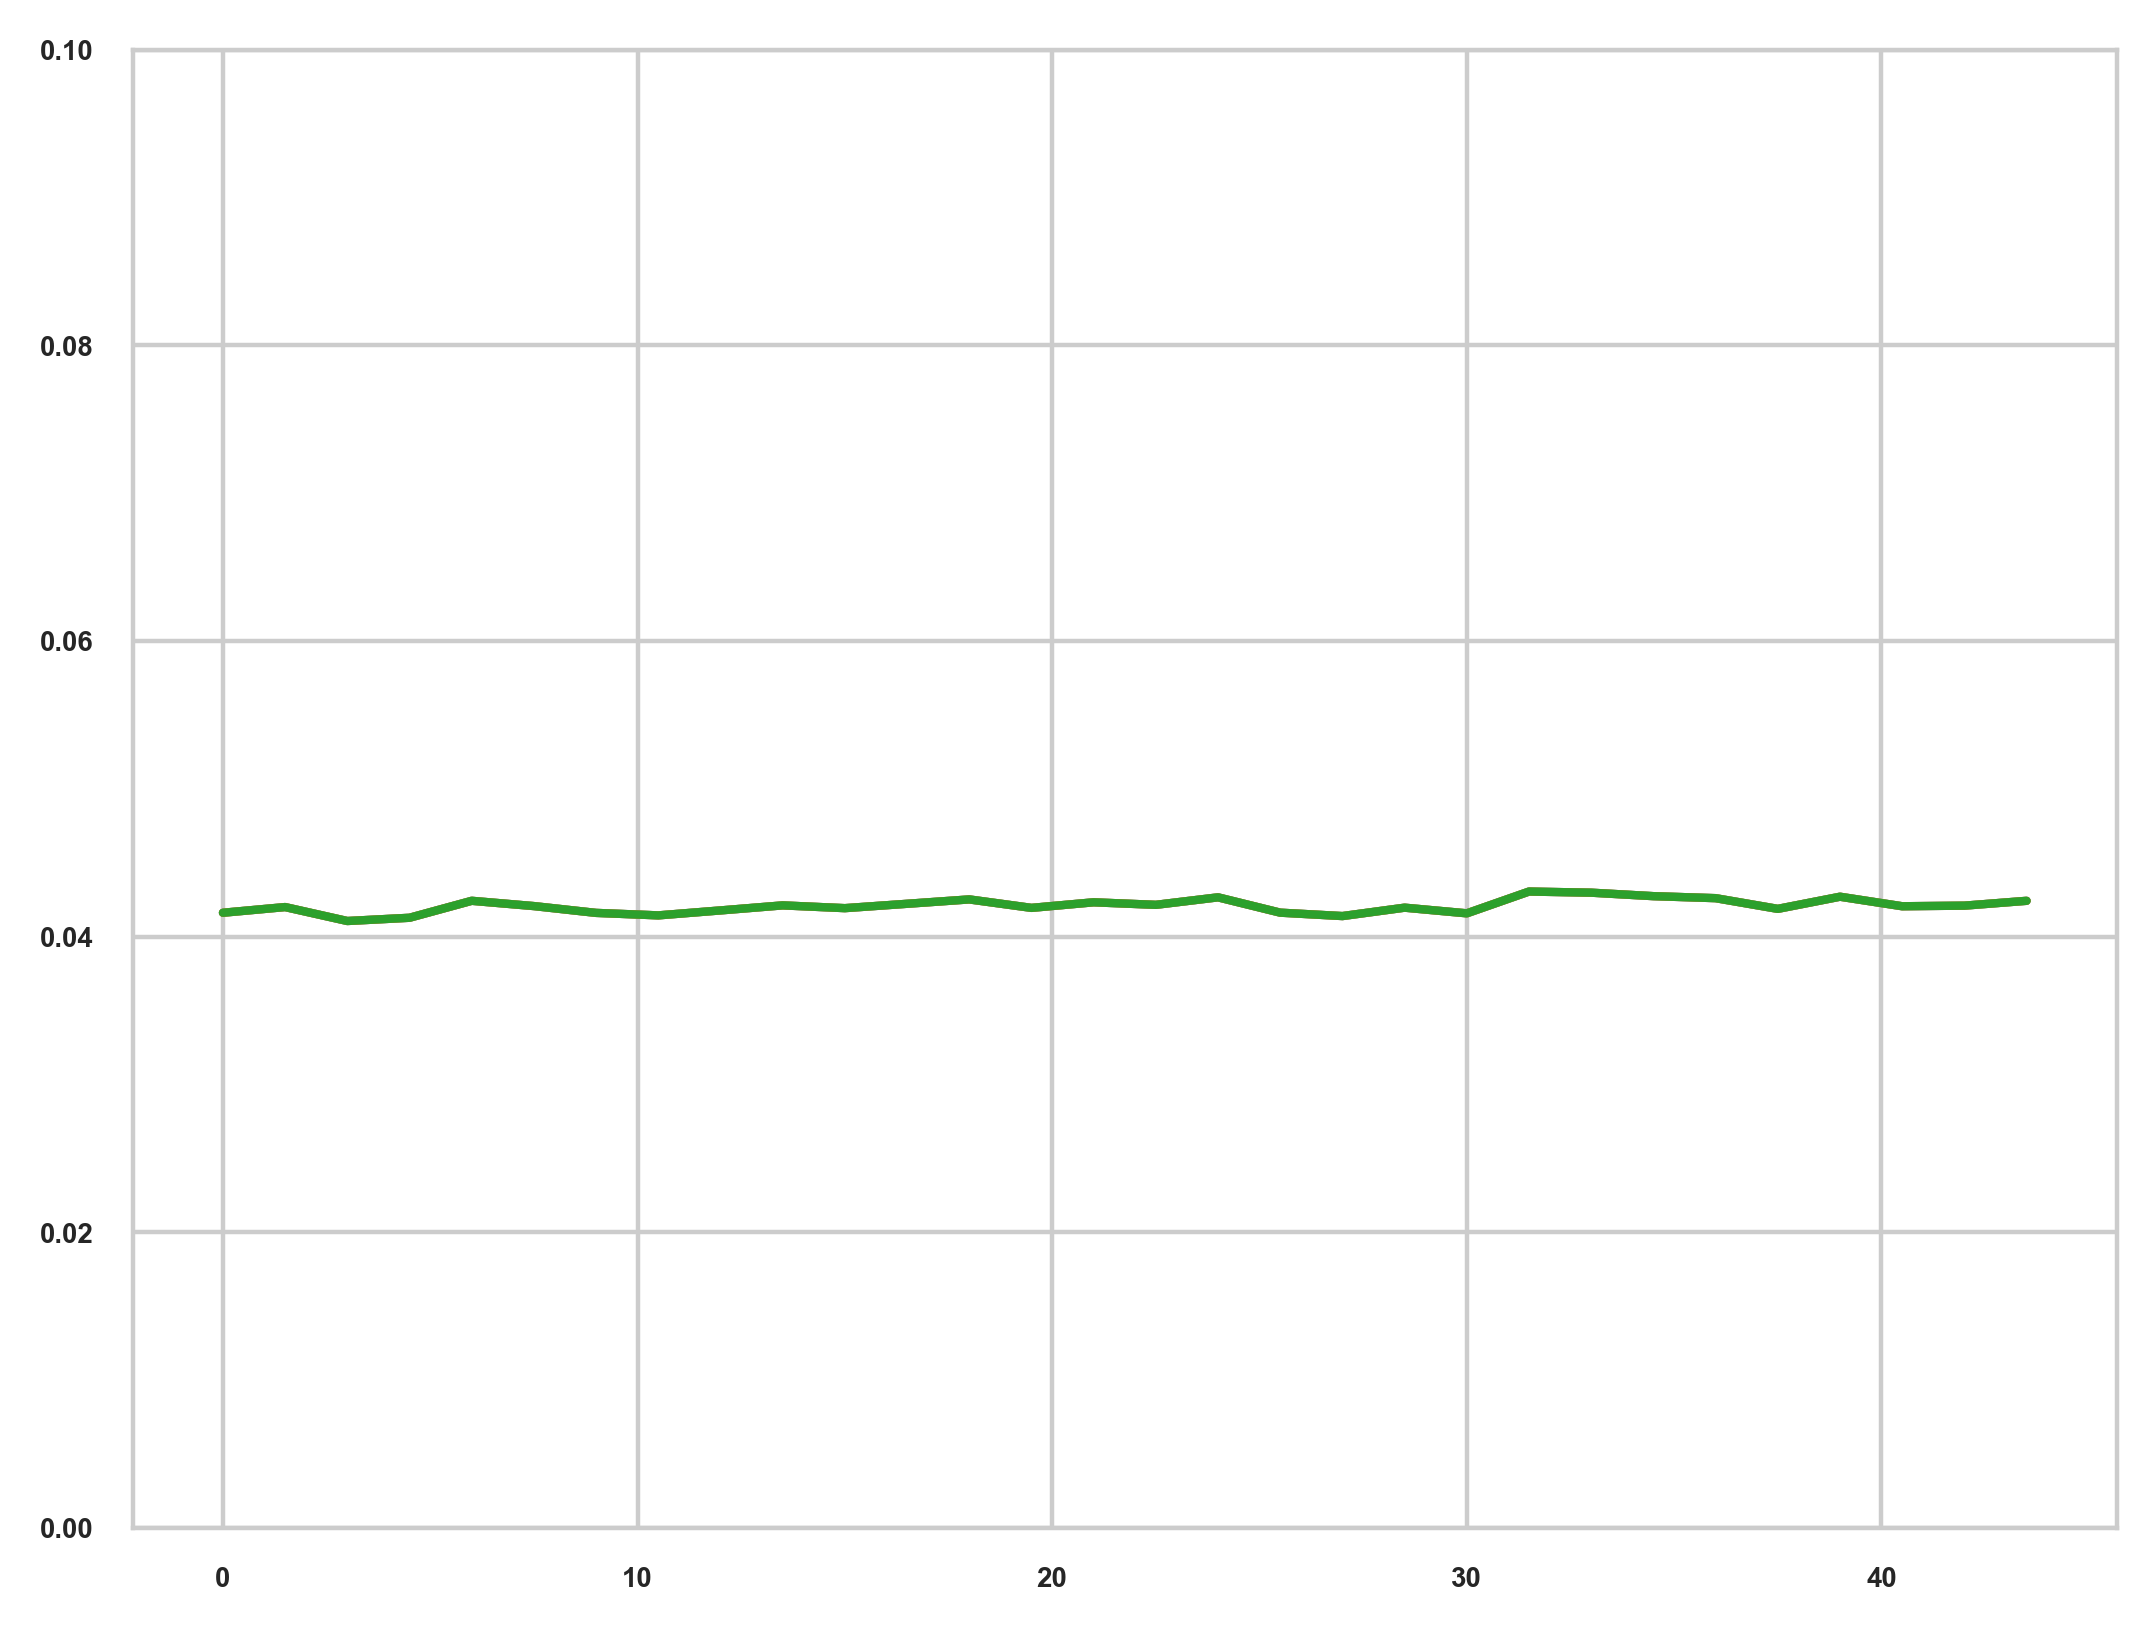

In [48]:
print(df4)

fig,ax = plt.subplots()

newdf = pd.to_numeric(df3['sample_1'])
newdfx = pd.to_numeric(df3["x_values"])

ax.plot(newdfx, newdf)
ax.plot(newdfx, newdf)
ax.plot(newdfx, newdf)
ax.set_ylim(0,0.1)


newdf = [1,2]

for i in newdf:
    number = round(i, 4)
    print(number)



In [5]:
## Modelling the data with PySCeS

from scipy import stats
import numpy as np

#data = locals()["df_1"]

#print(data)

slopes = []

for i in concentrations:
    print(i)
    conc = locals()["df_"+str((concentrations.index(i)))]
    slope_1 = []
    for j in range(3):
        slope, intercept, rvalue, pvalue, stderr = stats.linregress(conc["x_values"], conc["sample_"+str(j)])
        slope_1.append(slope)
    slopes.append(slope_1)

print(slopes)


slopes_mean = []

for i in slopes:
    slope_array = np.array(i)
    slopes_mean.append(np.mean(slope_array))

print(slopes_mean)





0
1
2
3
4
5
6
7
[[6.657801378197065e-06, 1.6237970388587915e-05, 7.1749245877218915e-06], [-0.0009863470820453111, -0.0009872768162002934, -0.001019721590661731], [-0.002304869327071717, -0.00191995920411527, -0.001828399286142088], [-0.002818555193580141, -0.0027243487892769837, -0.002779854123972292], [-0.004230713481052326, -0.004230378831594624, -0.004200095774728042], [-0.006851264135317988, -0.006873112088237902, -0.006882175956610148], [-0.008920146598062586, -0.0088357201562191, -0.009076493929011905], [-0.010535276933431946, -0.010319335996616368, -0.010307529355363906]]
[1.002356545150229e-05, -0.0009977818296357784, -0.002017742605776358, -0.0027742527022764723, -0.004220396029124998, -0.006868850726722012, -0.008944120227764531, -0.010387380761804073]


0      0.000000
1      1.483333
2      2.966667
3      4.450000
4      5.950000
5      7.433333
6      8.916667
7     10.400000
8     11.950000
9     13.483333
10    14.983333
11    16.483333
12    17.983333
13    19.483333
14    20.983333
15    22.483333
16    23.983333
17    25.483333
18    26.983333
19    28.483333
20    30.000000
Name: x_values, dtype: float64


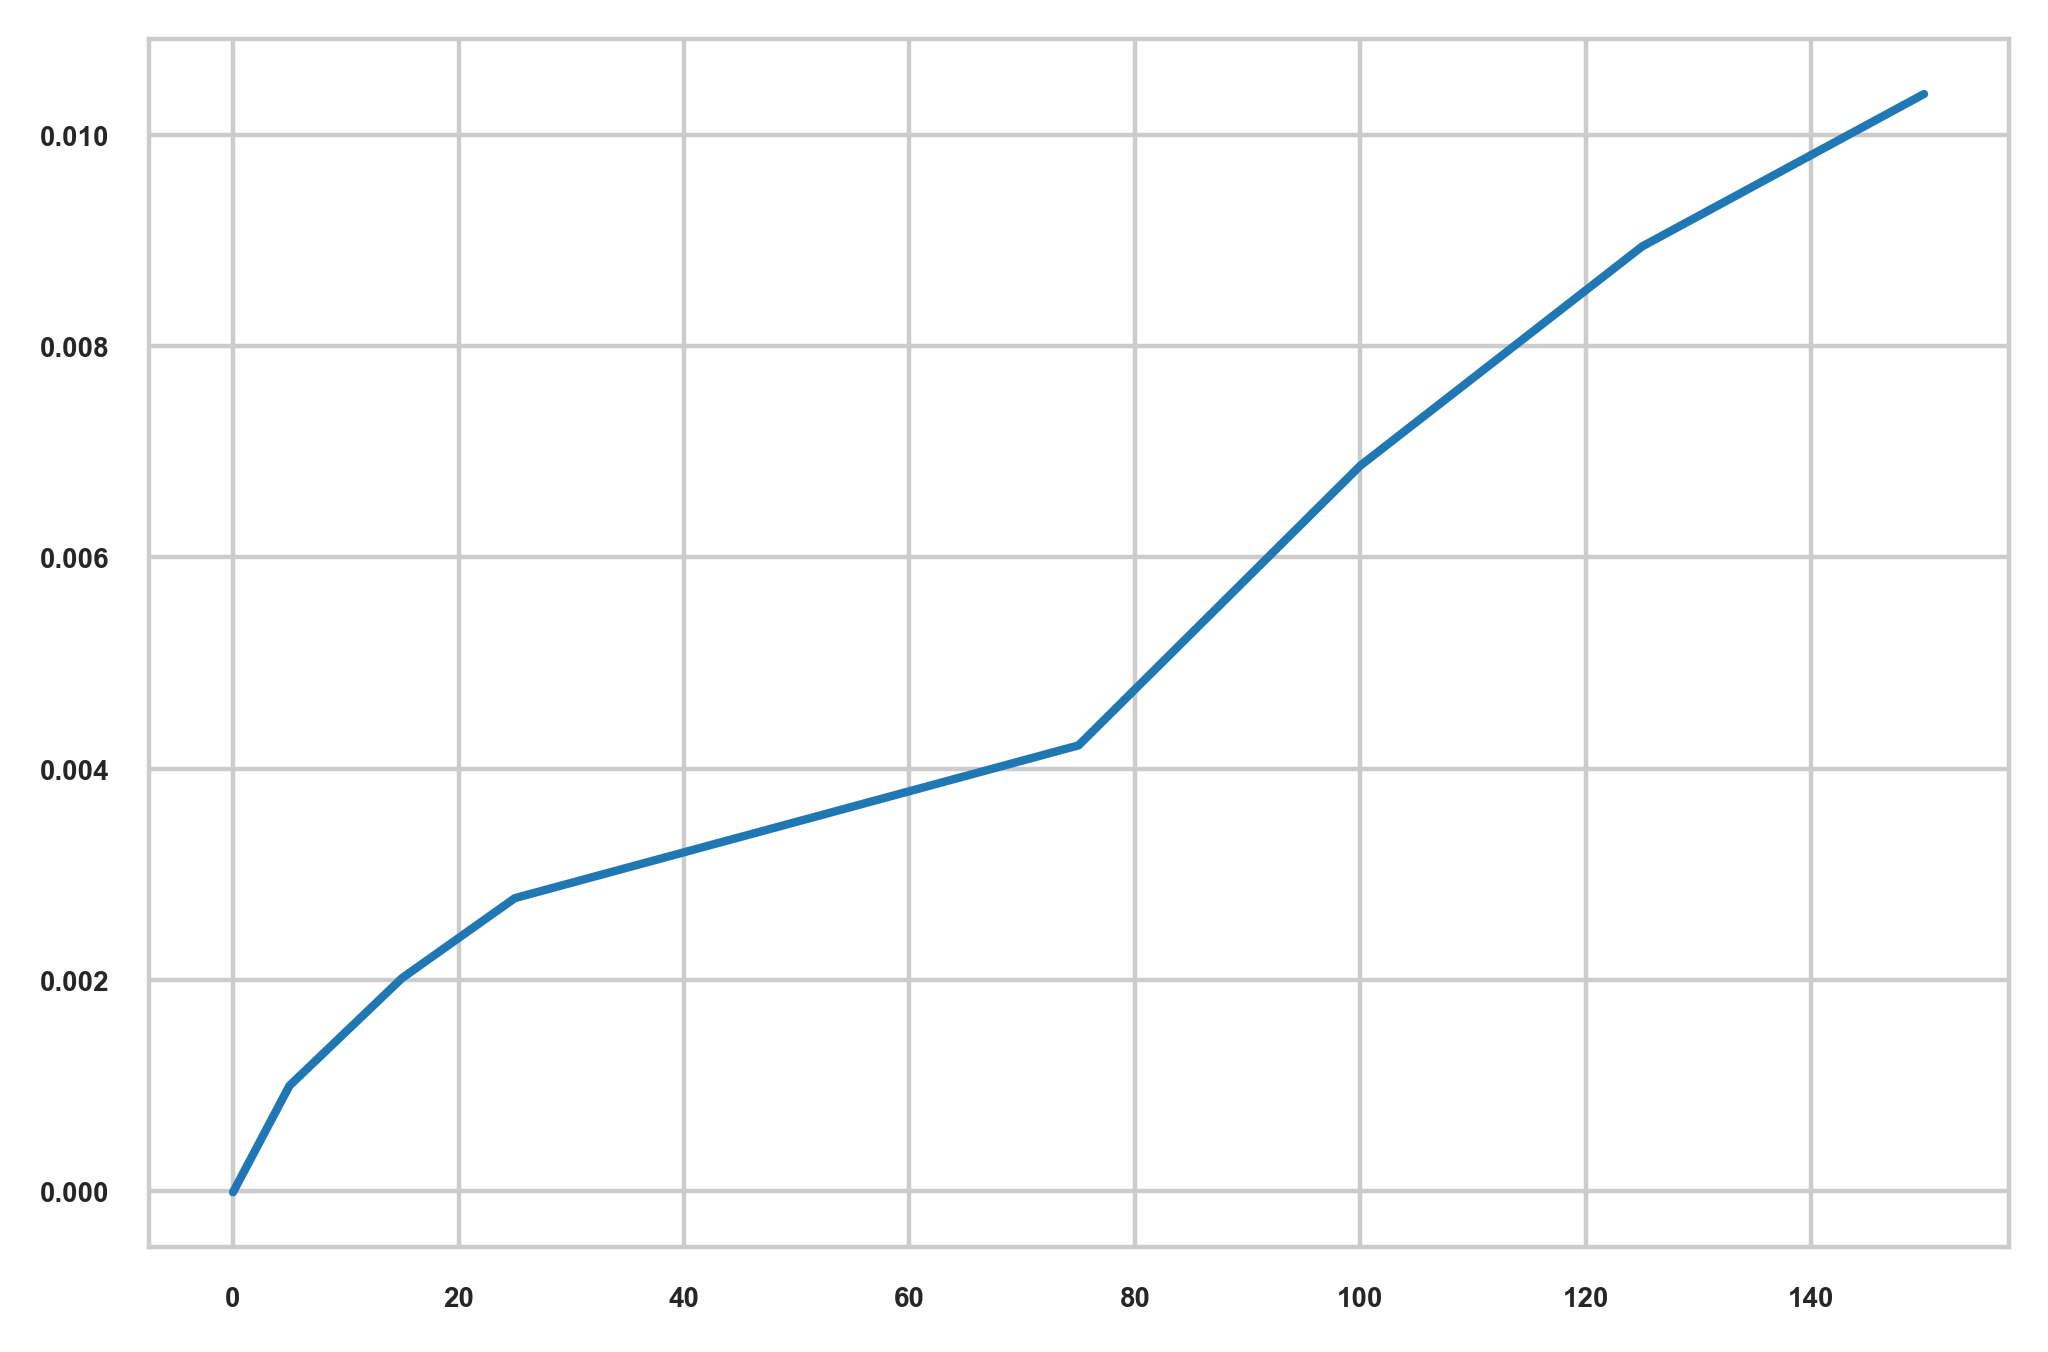

In [7]:
import matplotlib.pyplot as plt

dataframe = locals()["df_1"] 
x_values = dataframe["x_values"]
print(x_values)
concentrations = [0, 5,15,25, 75, 100, 125, 150]

slopes_array = np.array(slopes_mean)
slopes_positive = slopes_array*-1



plt.plot(concentrations, slopes_positive)

[-1.00235655e-05  9.97781830e-04  2.01774261e-03  2.77425270e-03
  4.22039603e-03  6.86885073e-03  8.94412023e-03  1.03873808e-02]
[[Model]]
    Model(mm)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 8
    # variables        = 1
    chi-square         = 5.4968e-06
    reduced chi-square = 7.8526e-07
    Akaike info crit   = -111.526288
    Bayesian info crit = -111.446847
[[Variables]]
    km:  173.458970 +/- 15.7697848 (9.09%) (init = 2)
[0.         0.00056035 0.00159186 0.00251941 0.00603721 0.00731371
 0.00837636 0.00927475]


Text(0, 0.5, 'reaction velocity in $mmol*L^{-1}*s^{-1}$')

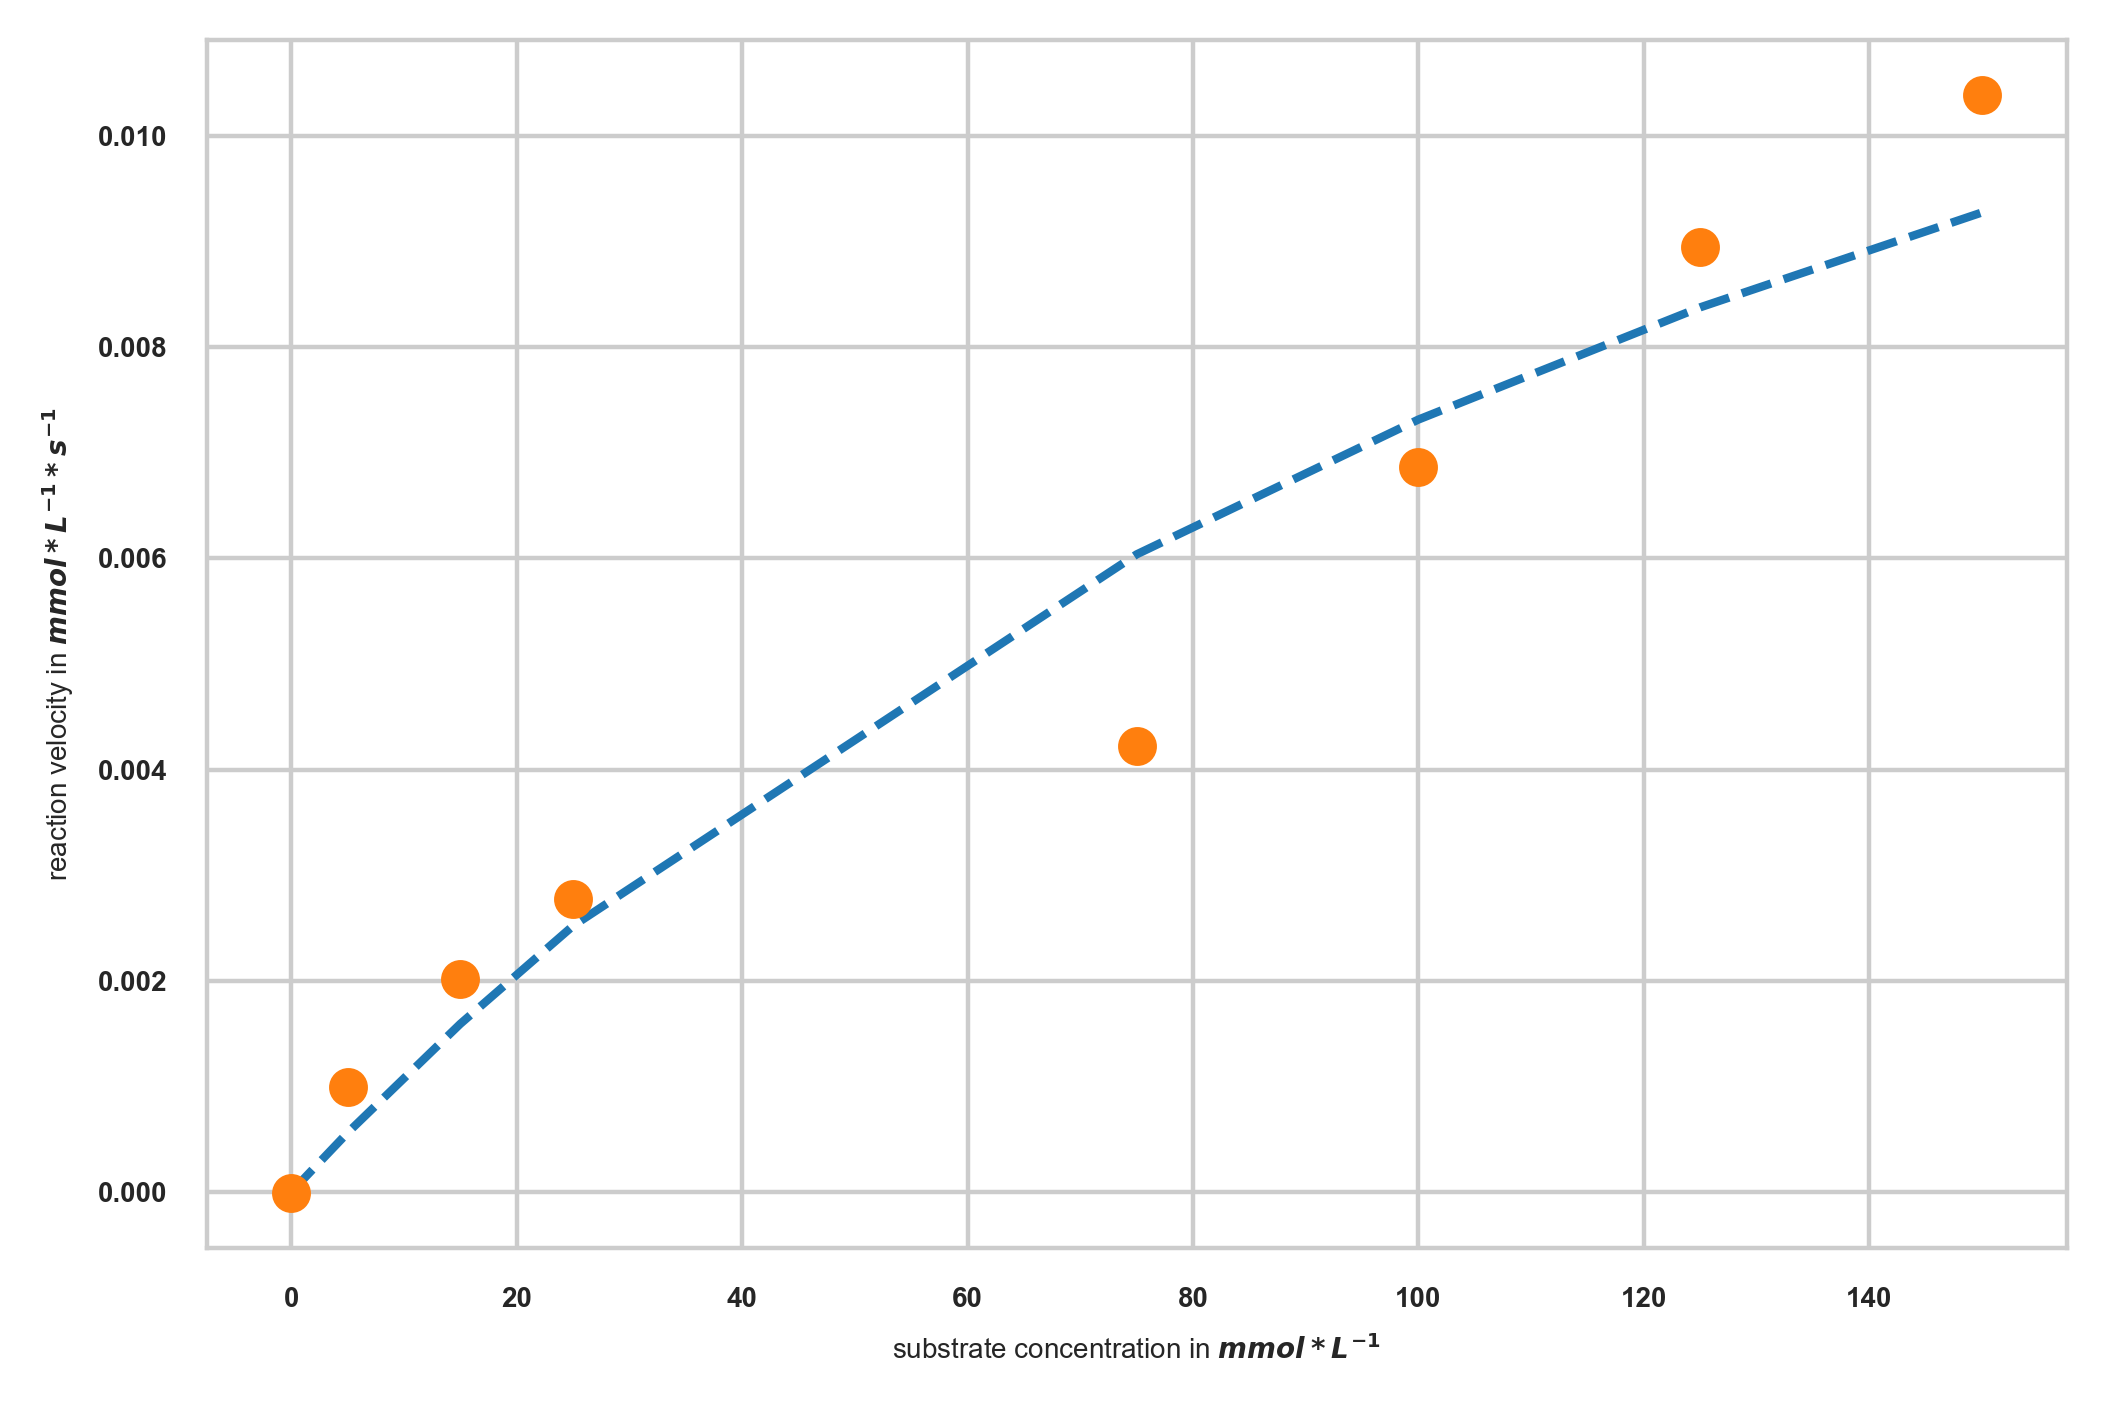

In [15]:
import lmfit

reaction_velocity = slopes_positive
print(reaction_velocity)
concentrations = np.array(concentrations)

def mm(s, km):
    v = 0.02*s/(km+s)
    return v

model = lmfit.Model(mm)

params = lmfit.Parameters()
params.add('km', 2, min=0.000001, max=500)
#params.add('vmax', 2, min=0.0000000001, max=100)

solution = model.fit(reaction_velocity,params=params,s=concentrations)

print(solution.fit_report())
print(solution.best_fit)

fitted_data = solution.best_fit


fig, ax = plt.subplots()

ax.plot(concentrations, fitted_data, linestyle="--")
ax.plot(concentrations, reaction_velocity, linestyle="", marker="o")
ax.set_xlabel("substrate concentration in $mmol*L^{-1}$")
ax.set_ylabel("reaction velocity in $mmol*L^{-1}*s^{-1}$")


In [29]:
import pandas as pd
import re
import numpy as np

with open('Thermo plate reader\ABTS_reaction.txt') as file:
    lines = file.readlines()
    #print(lines)

df = pd.read_csv(r'Thermo plate reader\ABTS_reaction.csv', delimiter=r';')
#print(df)

columns_deleted = df.drop(df.columns[0], axis=1)
#print(columns_deleted)

rows_deleted = df.drop(df.index[0:4])

#print(rows_deleted)


first_column = rows_deleted["Column2"]
#print(first_column)

#for i in first_column:
#    print(i)


na_deleted = first_column.dropna()

text = "Interation"

list= []

for i in na_deleted:
    test = re.search("^Iteration", i)
    if test:
        pass
    elif test==None:
        list.append(i)
    else:
#        except Exception as error:
            print("sorting error")
            raise

#print(6*30)

liste1 = list[0:180]

array = np.array(liste1)

reshaped = array.reshape((60, 3))

#print(reshaped)

array_sample = []
array_reference = []

for i in range(60):
    if i%2 == 0:
        array_sample.append(reshaped[i])
    else:
        array_reference.append(reshaped[i])


newarray = np.array(array_sample)
newarray_reference = np.array(array_reference)
df_test = pd.DataFrame(newarray, columns=['ref1', 'ref2', 'ref3'])
df_test1 = pd.DataFrame(newarray_reference, columns=['sample1', 'sample2', 'sample3'])

#print(df_test)
#print(df_test1)
print(len(df_test1))







30


In [30]:
x_values = []
for i in range(30):

    if len(x_values) == 0:
        x_values.append(0)
    elif len(x_values) != 0:
        last_value = x_values[i-1]
        x_values.append(last_value+1.5)

print(x_values)




[0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0, 16.5, 18.0, 19.5, 21.0, 22.5, 24.0, 25.5, 27.0, 28.5, 30.0, 31.5, 33.0, 34.5, 36.0, 37.5, 39.0, 40.5, 42.0, 43.5]
